# Getting Started with Titanic - Machine Learning from Disaster

# <img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg">

1. # Importing Python Libraries 📕 📗 📘 📙

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading training data</strong></h1>
    <i></i>
</div>

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")

# Exploratory data analysis of train data

# Five top records of data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Five last records of data

In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Coloumns/features in data

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Length of data

In [6]:
print('lenght of data is', len(train_data))

lenght of data is 891


# Shape of data

In [7]:
train_data.shape

(891, 12)

# Data information

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data types of all coloumns

In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking missing Values

In [10]:
train_data[train_data.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Count of missing values

In [11]:
np.sum(train_data.isnull().any(axis=1))

708

# Is there any missing values?

In [12]:
train_data.isnull().values.any()

True

# Counts of missing values in each column

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Looking at the train data missing values.

In [14]:
NANColumns=[]
i=-1
for a in train_data.isnull().sum():
    i+=1
    if a!=0:
        print(train_data.columns[i],a)
        NANColumns.append(train_data.columns[i])

Age 177
Cabin 687
Embarked 2


# Frequency Distribution of pclass

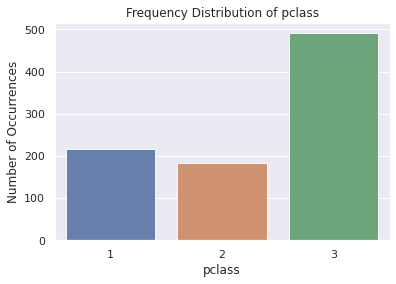

In [15]:
carrier_count = train_data["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pclass', fontsize=12)
plt.show()

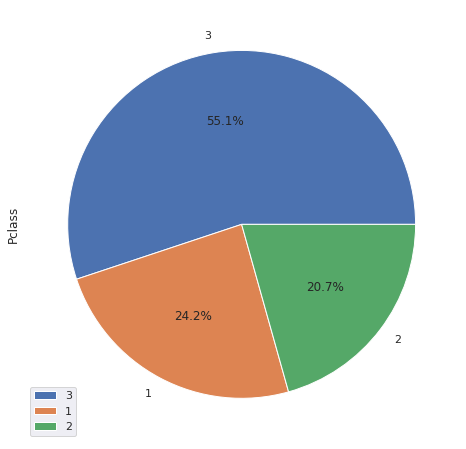

In [16]:
train_data["Pclass"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of survived

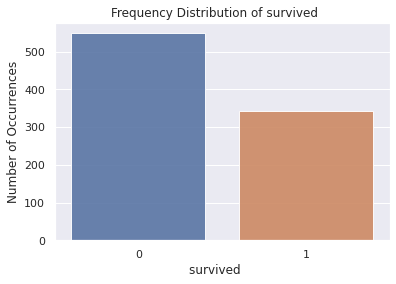

In [17]:
carrier_count = train_data["Survived"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of survived    ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('survived    ', fontsize=12)
plt.show()

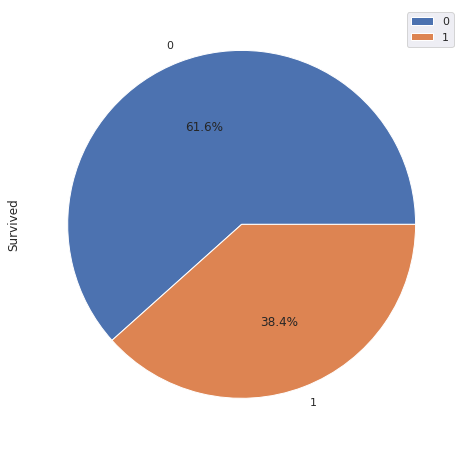

In [18]:
train_data["Survived"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of sex

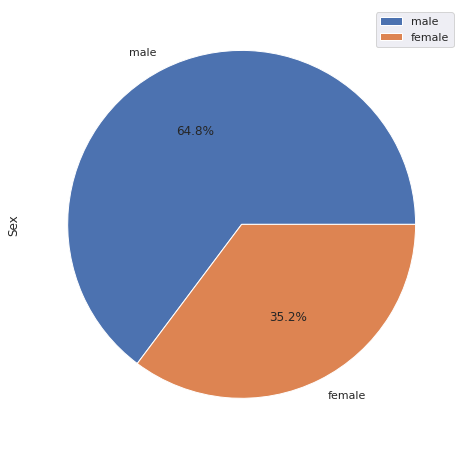

In [19]:
train_data["Sex"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of top 10 age

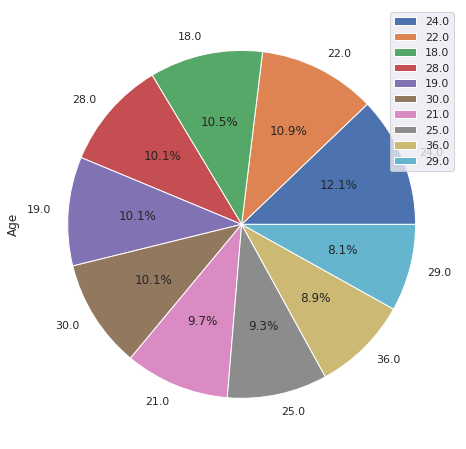

In [20]:
train_data["Age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of embarked

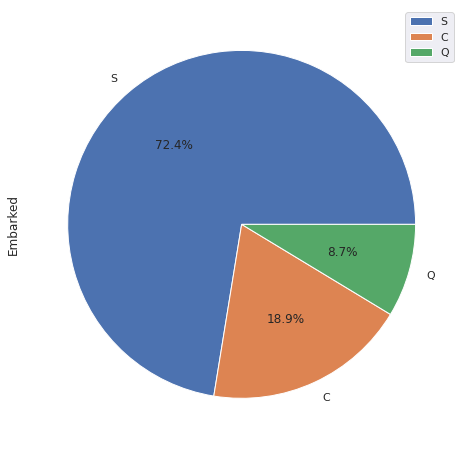

In [21]:
train_data["Embarked"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# All features of train data distrubution 

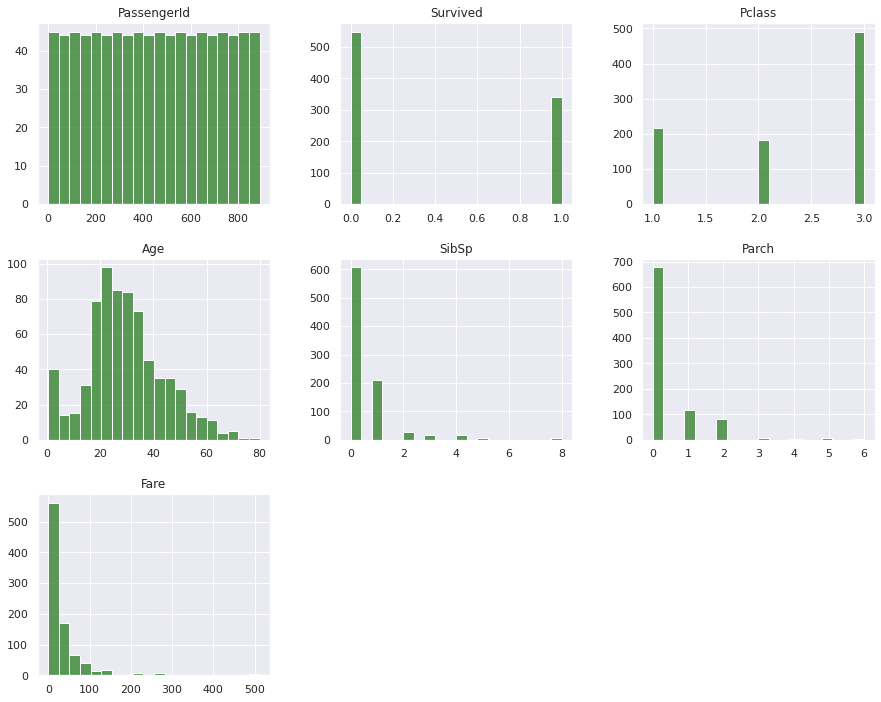

In [22]:
train_data.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading testing data</strong></h1>
    <i></i>
</div>

In [23]:
test_data = pd.read_csv("../input/titanic/test.csv")
ids_test_data = test_data['PassengerId'].values

# Exploratory data analysis of test data

# Five top records of data

In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Five last records of data

In [25]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Coloumns/features in data

In [26]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Length of data

In [27]:
print('lenght of data is', len(test_data))

lenght of data is 418


# Shape of data

In [28]:
test_data.shape

(418, 11)

# Data information

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data types of all coloumns

In [30]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking missing Values

In [31]:
test_data[test_data.isnull().any(axis=1)].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Count of missing values

In [32]:
np.sum(test_data.isnull().any(axis=1))

331

# Is there any missing values?

In [33]:
test_data.isnull().values.any()

True

# Counts of missing values in each column

In [34]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Looking at the test data missing values.

In [35]:
NANColumns=[]
i=-1
for a in test_data.isnull().sum():
    i+=1
    if a!=0:
        print(test_data.columns[i],a)
        NANColumns.append(test_data.columns[i])

Age 86
Fare 1
Cabin 327


# Frequency Distribution of pclass

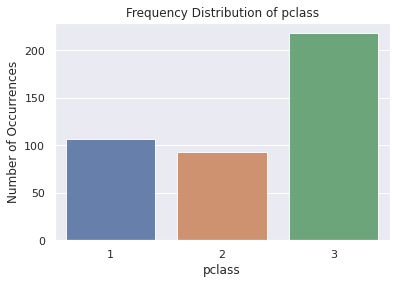

In [36]:
carrier_count = test_data["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pclass', fontsize=12)
plt.show()

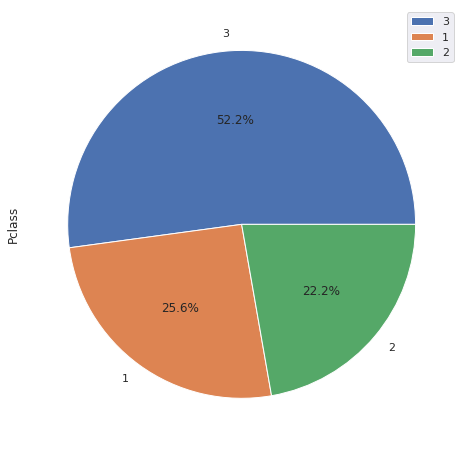

In [37]:
test_data["Pclass"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of sex

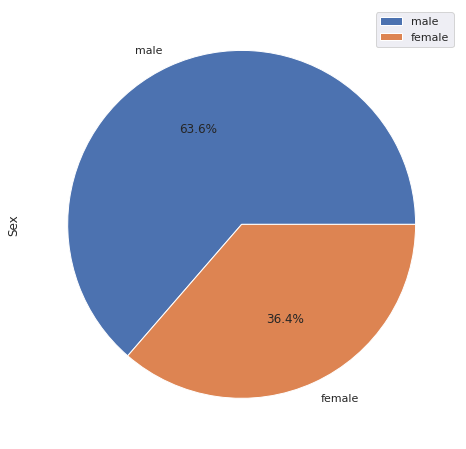

In [38]:
test_data["Sex"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of top 10 age

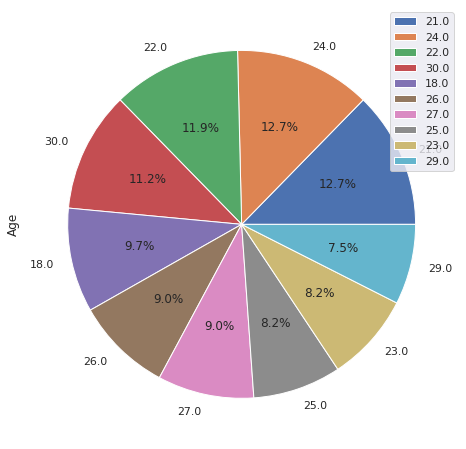

In [39]:
test_data["Age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of embarked

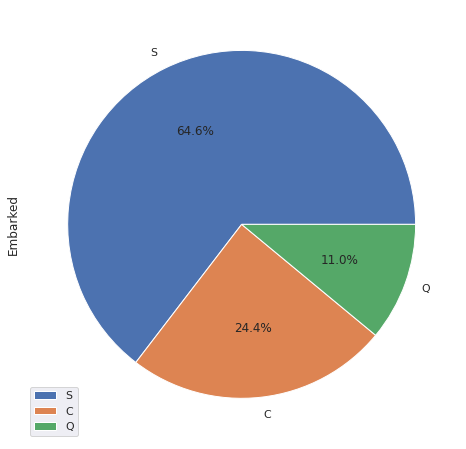

In [40]:
test_data["Embarked"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# All features of test data distrubution 

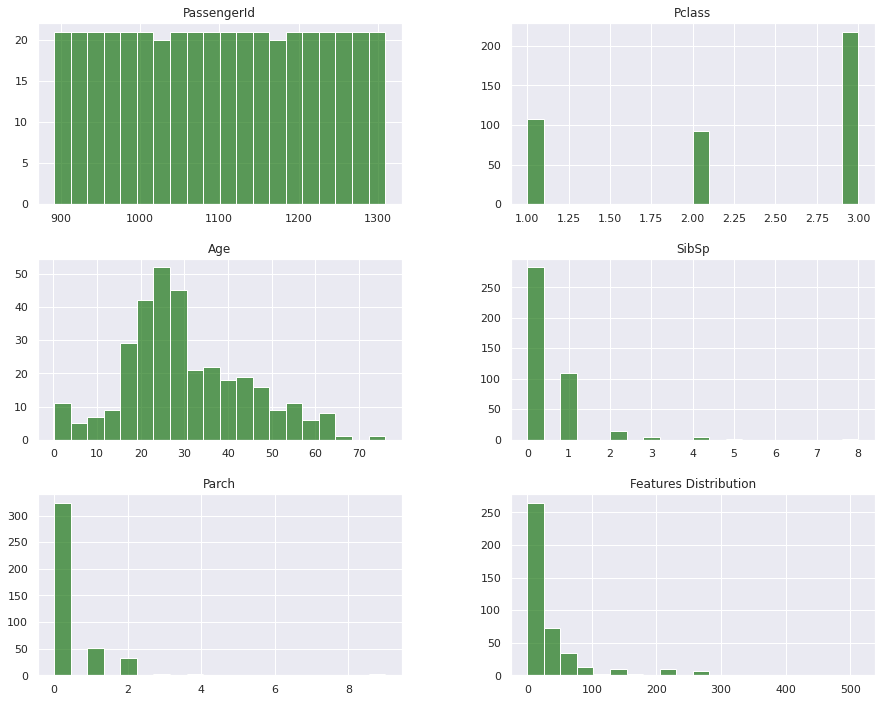

In [41]:
test_data.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

# Looking at correlated features with Survived 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

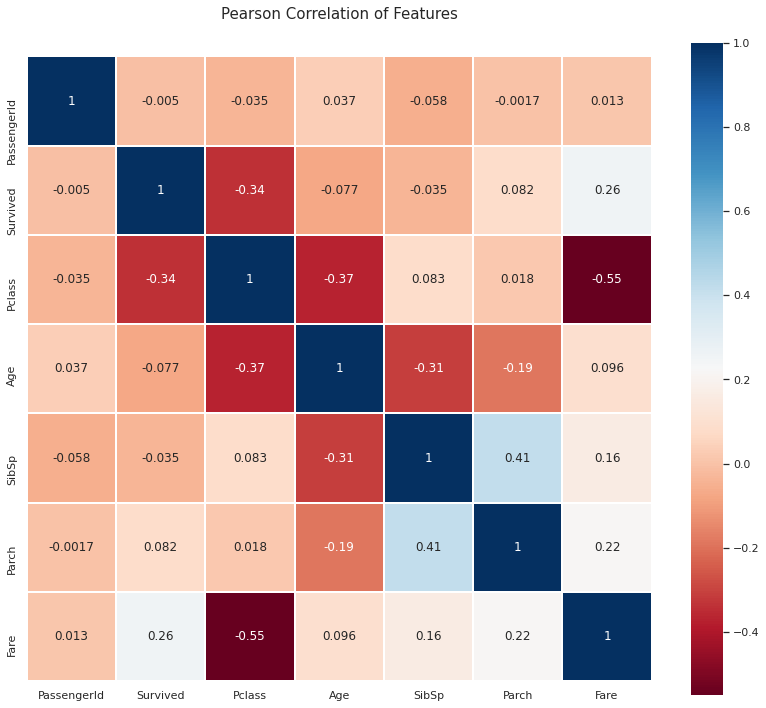

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<div class="alert alert-block alert-danger">  
<h2><center><strong>As we can see from the graphs, features has good correlation with Pclass</strong></center></h2>
        
</div>

# Correlation Survived with Pclass

In [43]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- We can see that the correlation of pclass with survived is more than 0.5 among Pclass=1 so we are going to add this feature in training

# Correlation Survived with SEX

In [44]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- We can see that the correlation of Sex with survived is more than 0.5 among Sex=female so we are going to add this feature in training

# Correlation Survived with SibSp

In [45]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- We can see that the siblling with 1 is high correlated with survival but others are lower and zero

# Correlation Survived with Parch

In [46]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- We can see that the Parch with 1 and 2 is high correlated with survival but others are lower and zero

# Age plot

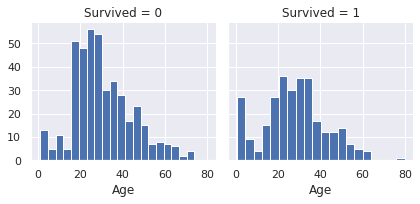

In [47]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- As we can see that most of old age peoples not survived

# Pclass plot

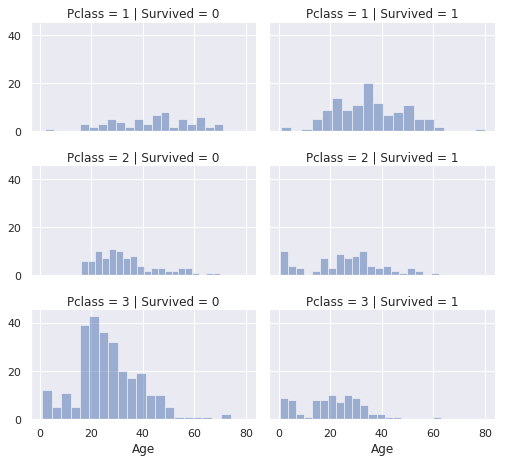

In [48]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- Pclass=3 had most passengers, however most did not survive.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
- Most passengers in Pclass=1 survived. 
- Pclass varies in terms of Age distribution of passengers.

# Embarked plot

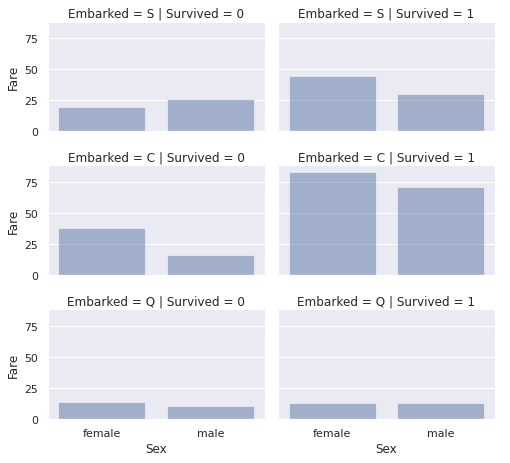

In [49]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates. 

<div class="alert alert-block alert-info">  
<h2><center><strong>Features engineering and preparation</strong></center></h2>
        
</div>

## Extract the Survived out from the train data

In [50]:
y = train_data["Survived"]

## Combining the train and test dataset

In [51]:
all_data = pd.concat([train_data,test_data],axis=0).reset_index(drop=True)

## Drop the Survived & PassengerId  columns

In [52]:
all_data = all_data.drop(["Survived","PassengerId"],axis=1)

## A function for checking the missing values

In [53]:
def missing_value(df):
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    percentage = df.isnull().sum() *100 / df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(all_data)

,Total,Percentage
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


## Imputing the Missing Values of all data

### int = numrical features 
### object = categorical features 

In [54]:
## Imputing the missing values with the Mode because mode fill the values with the most accuring values and best for the categorical features
all_data["Cabin"] = all_data["Cabin"].transform(lambda x: x.fillna(x.mode()[0]))

In [55]:
## Imputing the missing values with the Mode because mode fill the values with the most accuring values and best for the categorical features
all_data["Embarked"] = all_data["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [56]:
#Mapping the Age into 5 groups from 0 to 4
all_data['Age']=all_data.loc[ all_data['Age'] <= 16, 'Age'] = 0
all_data['Age']=all_data.loc[(all_data['Age'] > 16) & (all_data['Age'] <= 32), 'Age'] = 1
all_data['Age']=all_data.loc[(all_data['Age'] > 32) & (all_data['Age'] <= 48), 'Age'] = 2
all_data['Age']=all_data.loc[(all_data['Age'] > 48) & (all_data['Age'] <= 64), 'Age'] = 3
all_data['Age']=all_data.loc[ all_data['Age'] > 64, 'Age'] = 4 

In [57]:
#Mapping the Fare into 5 groups from 0 to 4
all_data['Fare']=all_data.loc[ all_data['Fare'] <= 7.91, 'Fare'] = 0
all_data['Fare']=all_data.loc[(all_data['Fare'] > 7.91) & (all_data['Fare'] <= 14.454), 'Fare'] = 1
all_data['Fare']=all_data.loc[(all_data['Fare'] > 14.454) & (all_data['Fare'] <= 31), 'Fare']   = 2
all_data['Fare']=all_data.loc[ all_data['Fare'] > 31, 'Fare'] = 3
all_data['Fare']=all_data['Fare'] = all_data['Fare'].astype(int)

In [58]:
#Checking missing values now
missing_value(all_data)

,Total,Percentage


## Coverting the categorical features into numeric form by applying the get_dummies function

In [59]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

## Now splitting the data for training and testing with same index ID's

In [60]:
n = len(y)
train_data = all_data[:n]
test_data = all_data[n:]

<div class="alert alert-block alert-info">  
<h2><center><strong> Building the models for training and testing</strong></center></h2>
        
</div>

<div class="alert alert-block alert-danger">  
<h2><center><strong> Applying Cross Vaildation on each algorithm</strong></center></h2>
        
</div>

In [61]:
X = np.array(train_data)
y = np.array(y)

# Random Forest Machine Algorithm

KFold Split: 1


Running time of algorithm
CPU times: user 480 ms, sys: 2.24 ms, total: 482 ms
Wall time: 482 ms
Accuracy of KFold  1 is:  0.8212290502793296


Classification Report of KFold  1  is following:


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       120
           1       0.74      0.71      0.72        59

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



Confusion Matrix of KFold  1  is following:


[[105  15]
 [ 17  42]]




KFold Split: 2


Running time of algorithm
CPU times: user 485 ms, sys: 619 µs, total: 486 ms
Wall time: 486 ms
Accuracy of KFold  2 is:  0.797752808988764


Classification Report of KFold  2  is following:


              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.67      0.75        79

    accuracy  

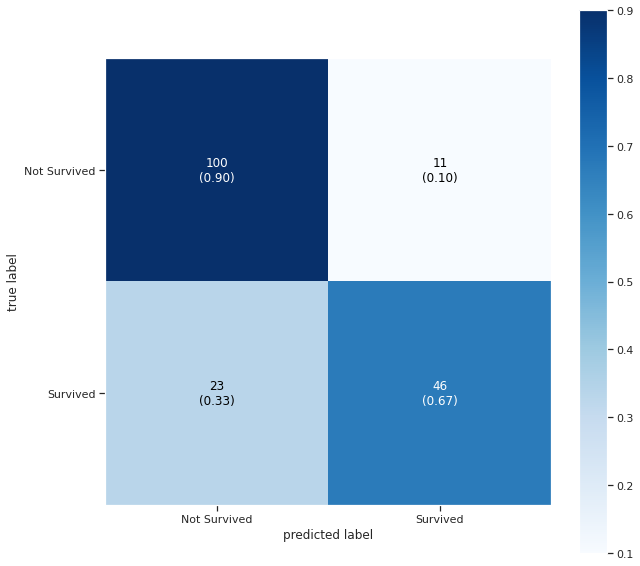





Total Average Accuracy of Random Forest Classifier is : 0.8148076078086749


In [62]:
rf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
kf = KFold(n_splits=5)
outcomes1 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(X,y):
    i=i+1
    print("KFold Split:",i)
    print('\n')
    fold += 1
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    print('Running time of algorithm')
    %time rf.fit(Xtrain, ytrain)
    predictions = rf.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes1.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy)
    print('\n')
    print("Classification Report of KFold ",i," is following:")
    print('\n')
    CR=classification_report(ytest, predictions)
    print(CR)
    print('\n')
    print("Confusion Matrix of KFold ",i," is following:")
    print('\n')
    CM=confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')
    print('\n')

print('\n')
print('Average Confusion Matrix')
aa = np.mean(conf_matrix_list_of_arrays, axis=0)

aaa = np.ceil(aa)

b=pd.DataFrame(aaa)
b=b.astype(int)
labels =['Not Survived','Survived']

c=np.array(b)

fig, ax = plot_confusion_matrix(conf_mat=c,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()
print('\n')
print('\n')
mean_outcome1 = np.mean(outcomes1)
print("Total Average Accuracy of Random Forest Classifier is : {0}".format(mean_outcome1)) 

# KNN Machine Algorithm

KFold Split: 1


Running time of algorithm
CPU times: user 663 µs, sys: 0 ns, total: 663 µs
Wall time: 637 µs
Accuracy of KFold  1 is:  0.7597765363128491


Classification Report of KFold  1  is following:


              precision    recall  f1-score   support

           0       0.78      0.90      0.83       120
           1       0.70      0.47      0.57        59

    accuracy                           0.76       179
   macro avg       0.74      0.69      0.70       179
weighted avg       0.75      0.76      0.75       179



Confusion Matrix of KFold  1  is following:


[[108  12]
 [ 31  28]]




KFold Split: 2


Running time of algorithm
CPU times: user 0 ns, sys: 2.68 ms, total: 2.68 ms
Wall time: 728 µs
Accuracy of KFold  2 is:  0.7134831460674157


Classification Report of KFold  2  is following:


              precision    recall  f1-score   support

           0       0.67      0.94      0.78        99
           1       0.85      0.43      0.57        79

    accuracy    

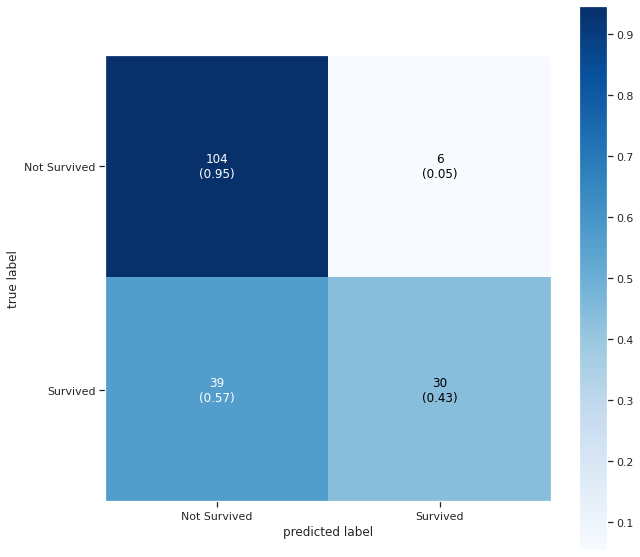





Total Average Accuracy of KNN Classifier is : 0.7508317117569518


In [63]:
rf = KNeighborsClassifier(n_neighbors=2)
kf = KFold(n_splits=5)
outcomes2 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(X,y):
    i=i+1
    print("KFold Split:",i)
    print('\n')
    fold += 1
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    print('Running time of algorithm')
    %time rf.fit(Xtrain, ytrain)
    predictions = rf.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes2.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy)
    print('\n')
    print("Classification Report of KFold ",i," is following:")
    print('\n')
    CR=classification_report(ytest, predictions)
    print(CR)
    print('\n')
    print("Confusion Matrix of KFold ",i," is following:")
    print('\n')
    CM=confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')
    print('\n')

print('\n')
print('Average Confusion Matrix')
aa = np.mean(conf_matrix_list_of_arrays, axis=0)

aaa = np.ceil(aa)

b=pd.DataFrame(aaa)
b=b.astype(int)
labels =['Not Survived','Survived']

c=np.array(b)

fig, ax = plot_confusion_matrix(conf_mat=c,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()
print('\n')
print('\n')
mean_outcome2 = np.mean(outcomes2)
print("Total Average Accuracy of KNN Classifier is : {0}".format(mean_outcome2)) 

# Decision Trees Machine Algorithm

KFold Split: 1


Running time of algorithm
CPU times: user 51.3 ms, sys: 2 µs, total: 51.3 ms
Wall time: 50.7 ms
Accuracy of KFold  1 is:  0.8379888268156425


Classification Report of KFold  1  is following:


              precision    recall  f1-score   support

           0       0.84      0.93      0.89       120
           1       0.83      0.64      0.72        59

    accuracy                           0.84       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.84      0.84      0.83       179



Confusion Matrix of KFold  1  is following:


[[112   8]
 [ 21  38]]




KFold Split: 2


Running time of algorithm
CPU times: user 61.5 ms, sys: 0 ns, total: 61.5 ms
Wall time: 61.3 ms
Accuracy of KFold  2 is:  0.8146067415730337


Classification Report of KFold  2  is following:


              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.90      0.66      0.76        79

    accuracy

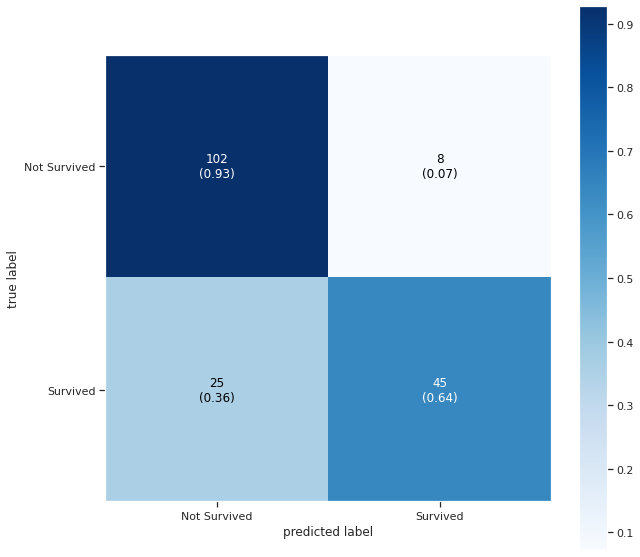





Total Average Accuracy of Decision Trees Classifier is : 0.8204067541271736


In [64]:
rf = DecisionTreeClassifier(random_state=10)
kf = KFold(n_splits=5)
outcomes3 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(X,y):
    i=i+1
    print("KFold Split:",i)
    print('\n')
    fold += 1
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    print('Running time of algorithm')
    %time rf.fit(Xtrain, ytrain)
    predictions = rf.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes3.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy)
    print('\n')
    print("Classification Report of KFold ",i," is following:")
    print('\n')
    CR=classification_report(ytest, predictions)
    print(CR)
    print('\n')
    print("Confusion Matrix of KFold ",i," is following:")
    print('\n')
    CM=confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')
    print('\n')

print('\n')
print('Average Confusion Matrix')
aa = np.mean(conf_matrix_list_of_arrays, axis=0)

aaa = np.ceil(aa)

b=pd.DataFrame(aaa)
b=b.astype(int)
labels =['Not Survived','Survived']

c=np.array(b)

fig, ax = plot_confusion_matrix(conf_mat=c,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()
print('\n')
print('\n')
mean_outcome3 = np.mean(outcomes3)
print("Total Average Accuracy of Decision Trees Classifier is : {0}".format(mean_outcome3)) 

# Comparison of all algorithms Results

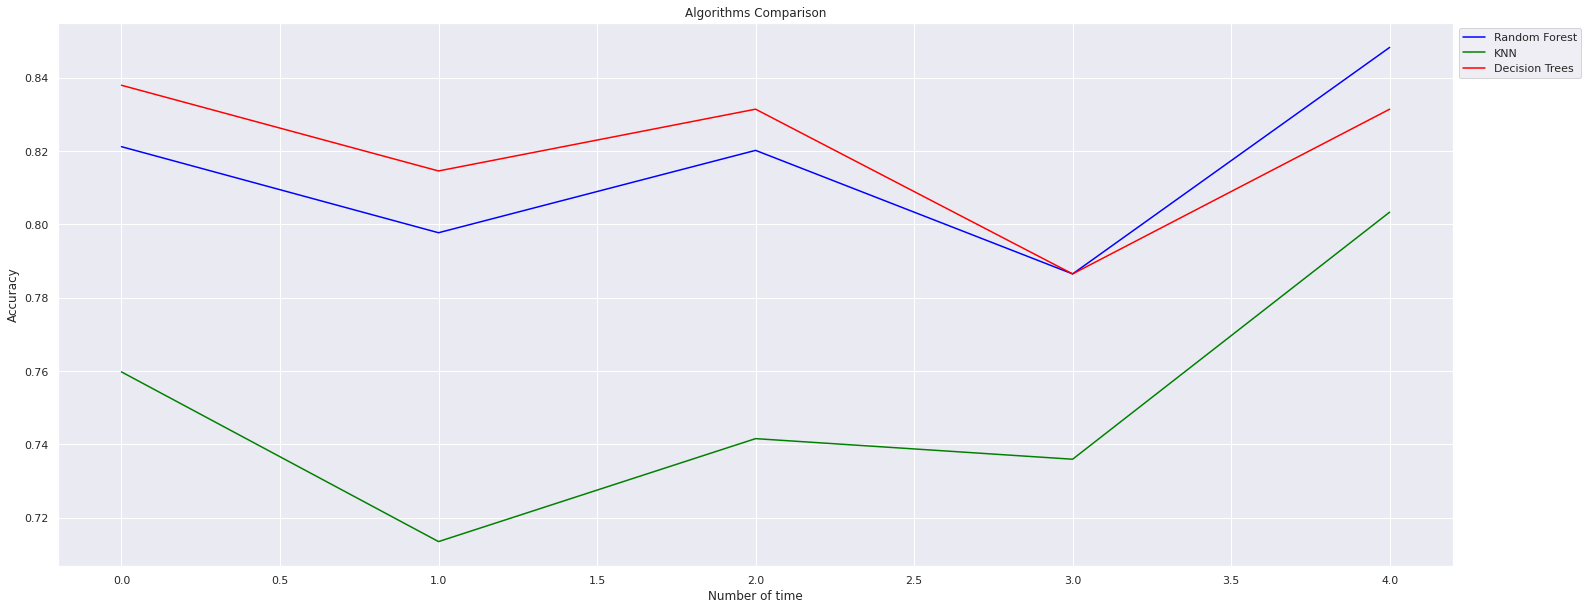

In [65]:
a=pd.DataFrame()
a['outcomes1']=outcomes1
a['outcomes2']=outcomes2
a['outcomes3']=outcomes3

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)
plt.plot(a.outcomes1.values,color='blue',label='Random Forest')
plt.plot(a.outcomes2.values,color='green',label='KNN')
plt.plot(a.outcomes3.values,color='red',label='Decision Trees')
plt.title('Algorithms Comparison')
plt.xlabel('Number of time')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot:>

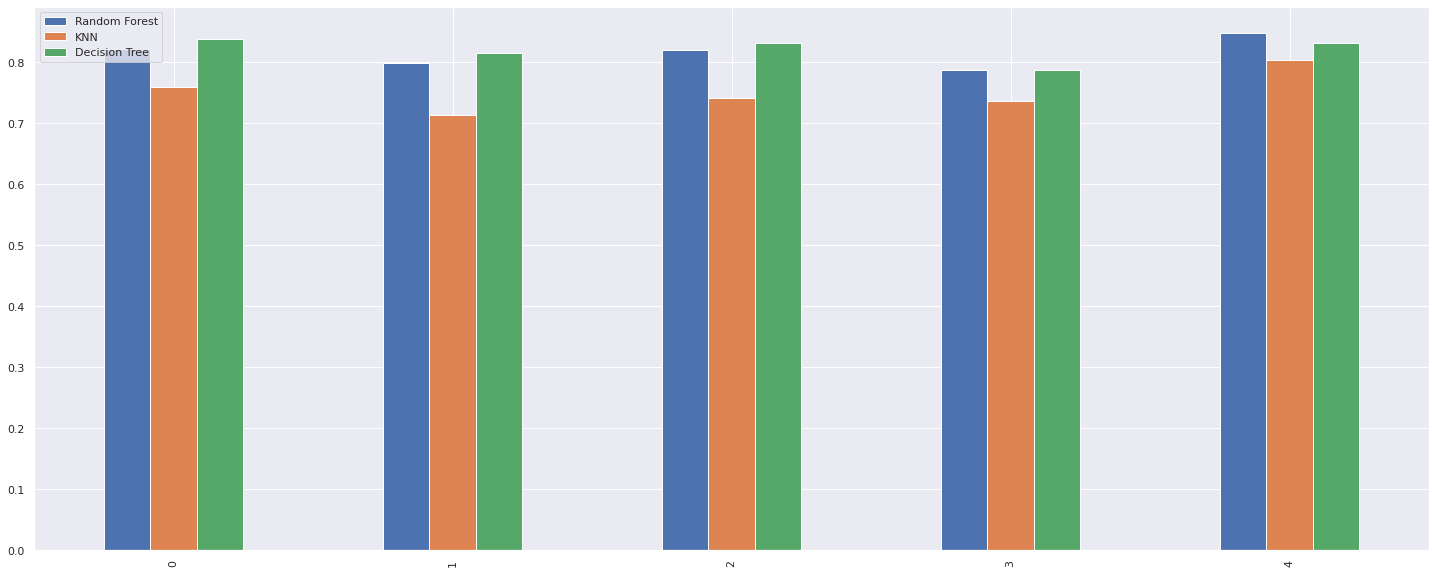

In [66]:
a=a.rename(columns={'outcomes1':'Random Forest', 'outcomes2':'KNN','outcomes3':'Decision Tree'})
a.plot(kind='bar',figsize=(25, 10))

# Comparison of all algorithms Results

In [67]:
a

,Random Forest,KNN,Decision Tree
0,0.821229,0.759777,0.837989
1,0.797753,0.713483,0.814607
2,0.820225,0.741573,0.831461
3,0.786517,0.735955,0.786517
4,0.848315,0.803371,0.831461


<div class="alert alert-block alert-danger">  
<h2><center><strong> Best Model is Random Forest as we can see that it performed well on cross validation</strong></center></h2>
        
</div>

In [68]:
final_model = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
final_model = final_model.fit(X,y)

<div class="alert alert-block alert-success">  
<h1><center><strong> Submitting the classifications on test data</strong></center></h1>
        
</div>

In [69]:
submission_results = pd.read_csv("../input/titanic/gender_submission.csv")
submission_results.iloc[:,1] = np.floor(np.expm1(final_model.predict(test_data)))
submission_results.to_csv('submission_results', index=False)

# <img src="https://thumbs.dreamstime.com/t/bright-colorful-thank-you-banner-vector-overlapping-letters-118244535.jpg">